# Previous

## Can be neglected (old code)

In [1]:
import numpy as np

In [2]:
"""Module for functions to generate initial conditions, matrices to store vectors, and storage"""

def initialrv(D, N):
    """Function intended to construct two 2D matrices with all elements randomly generated and considered to be the initial conditions for the particles
    
    The elements of both matrices are continuous uniform distributed.
    When generating the initial condition of the position, it is assumed that the the box is in the first quadrand/octant. The elements of r are therefore [0,1].
    The elements of v are [-1,1].
    
    
    Parameters
    ----------
    D : value for the number of spacial dimentions the particles exist in (integer)
    N : value for the number of particles
    
    Return
    ------
    r : 2D matrice for the intial position vectors
    v : 2D matrice for the intial velocity vectors
    """
    
    r = np.random.random_sample(size = (N, D))
    v = (np.random.random_sample(size = (N, D)) - 0.5) * 2
    return r, v

def rvmatrices(D, N, h):
    """This function constructs two 3D matrices with with all elements contianing the value 0 intened to be used to store the position and velocity vectors of the particles at different times
    
    Parameters
    ----------
    D : value for the number of spacial dimentions the particles exist in (integer)
    N : value for the number of particles
    h : value for the number of time steps
    
    Returns
    -------
    R : the 3D matrice for the position vectors
    V : the 3D matrice for the velocity vectors
    """
    
    R = np.zeros((h,N,D), dtype=float)
    V = np.zeros((h,N,D), dtype=float)
    return R, V

def storerv(R, V, r, v, h):
    """Funtion to store the calculated positions and velocies of the particles at different time steps.
    
    Parameters
    ----------
    h : the time step corresponding to the matrices
    r : 2D matrice containing the calculated position vectors of the particles at h
    v : 2D matrice containing the calculated velocity vectors of the particles at h
    
    Returns
    -------
    R : Altered 3D matrice used to store the position vectors now including r at h
    V : Altered 3D matrice used to store the velocity vectors now including v at h
    """
    
    R[h,:,:] = r
    V[h,:,:] = v
    
    return(R,V)

In [3]:
"""Adjustable variables"""

D = 2 # number of dimentions
h = 1e1 # number of time steps
N = 3 # number of particles

L = 1 # size of the square box the particles are simulated in
avg_v = 5 # average velocity of the particles

"""--------------------"""

h = int(h)


r0, v0 = initialrv(D,N) # generating initial conditions
R, V = rvmatrices(D,N,h) # generating matrices for storage
R, V = storerv(R,V,r0,v0,0) # storing initial condions in matrix


print(V)

[[[-0.91301983 -0.49030003]
  [ 0.21123757  0.43489288]
  [ 0.04266927 -0.05280972]]

 [[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]]]


## Copy of Simulate.ipynb

In [4]:
#import numpy as np
#import importlib

import matplotlib.pyplot as plt
#import skeleton
from skeleton import *

#%load_ext autoreload
#%autoreload 2

#importlib.reload(skeleton)

%load_ext autoreload\
%autoreload 2

Appeared to have worked, previously Verlet_integrate_images did not work, now it does.\
However, this methode did not work for Simulate.ipynb

In [5]:
"""Adjustable variables"""

D = 3 # number of dimentions
h = 400 # number of time steps
N = 22 # number of particles

L = 3*N**(1/3) # size of the square box the particles are simulated in

avg_v = 5 # average velocity of the particles

"""--------------------"""

h = int(h)


r0, v0 = init_rv_uniform(D,N,L)
r0 = r0 # generating initial conditions
r0[0,:] = np.asarray([2.5,2.5,0])
r0[1,:] = np.asarray([1.4,1.4,0])
v0 =  0 * v0 
R, V = gen_rv_matrices(D,N,h) # generating matrices for storage
R, V = store_rv(R,V,r0,v0,0) # storing initial condions in matrix

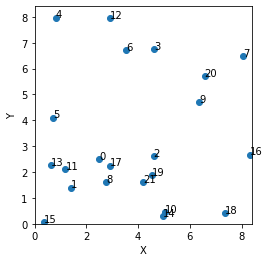

In [6]:
plt.scatter(r0[:,0], r0[:,1])
for i in range(N):
	plt.text(r0[i,0], r0[i,1], str(i))
plt.xlim([0,L])
plt.ylim([0,L])
plt.xlabel('X')
plt.ylabel("Y")
plt.gca().set_aspect('equal')
plt.show()

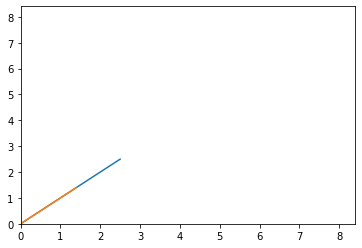

In [7]:
plt.plot(R[:,0,0], R[:,0,1])
plt.plot(R[:,1,0], R[:,1,1])
plt.xlim([0,L])
plt.ylim([0,L])
plt.show()

In [8]:
R1, V1, forces, potentials = Verlet_integrate_images(N, R, V, 1, h, 0, L, D=3)

In [9]:
R2, V2, forces2, potentials2 = Euler_integrate_images(N, R, V, 1, h, 0, L, D=3)

In [10]:
tsteps, tmp, tmp = R.shape

kin_V = particle_E_kin(V1)
kin_E = particle_E_kin(V2)



total_energy_V = np.sum(kin_V, axis=1).T + np.sum(potentials, axis=1)
total_energy_E = np.sum(kin_E, axis=1).T + np.sum(potentials2, axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

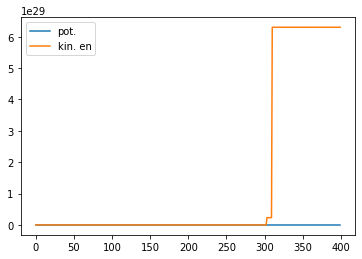

In [11]:
#plt.plot(relative_distance[0:350], label='rel. dist')
plt.plot(np.sum(potentials, axis=1), label='pot.')
plt.plot(np.sum(kin_V, axis=1), label='kin. en')
plt.legend()
plt.show

Arround 240 all particles gain kinetic energy, and again arround 330.\
This hapens with the Verlet method

<function matplotlib.pyplot.show(close=None, block=None)>

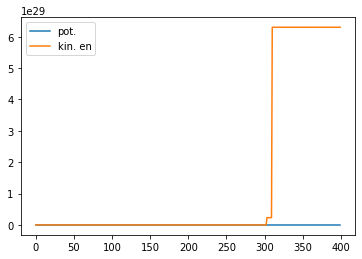

In [12]:
plt.plot(np.sum(potentials2, axis=1), label='pot.')
plt.plot(np.sum(kin_E, axis=1), label='kin. en')
plt.legend()
plt.show

The same happens using Euler's method

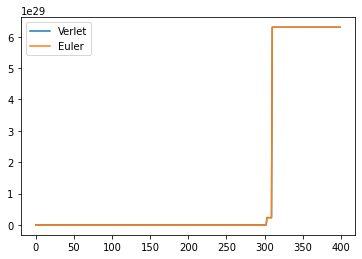

In [13]:
plt.plot(total_energy_V.T, label='Verlet')
plt.plot(total_energy_E.T, label='Euler')
plt.legend()

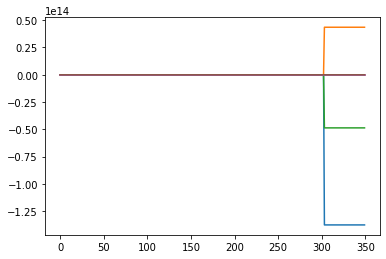

In [14]:
plt.plot(V[:350,0,:])
plt.plot(V[:350,1,:])

It appears as if the particle gains energy from the oscillation

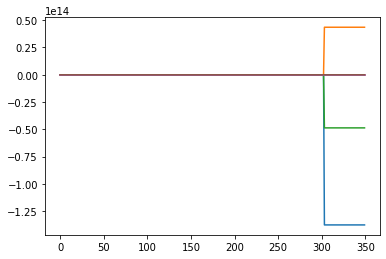

In [15]:
plt.plot(V2[:350,0,:])
plt.plot(V2[:350,1,:])

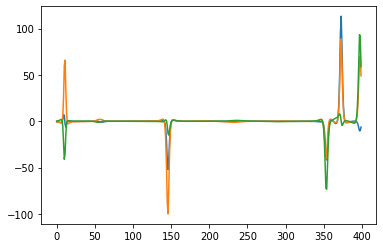

In [16]:
plt.plot(forces[:,0,:])

In [17]:
from matplotlib.animation import FuncAnimation, writers
import matplotlib as mpl

KeyboardInterrupt: 

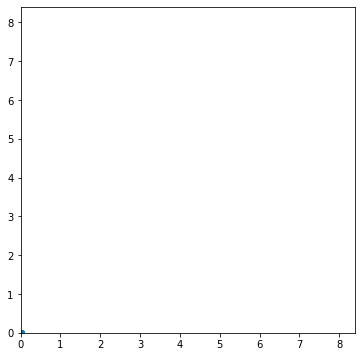

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(6, 6)

def init():
	ax.set_title("Particles in box")
	ax.set_ylabel('y')
	ax.set_xlabel('x')
	ax.scatter(R[0,:,0], R[0,:,1])
	ax.set_ylim([0,L])
	ax.set_xlim([0,L])

def animate(i):
	ax.cla()
	ax.set_ylim([0,L])
	ax.set_xlim([0,L])
	ax.scatter(R[i,:,0], R[i,:,1])

anim = FuncAnimation(fig, animate, init_func=init, frames=h, interval=50)
anim.save("figs/animation_images_test_Verlet.mp4", writer='ffmpeg')

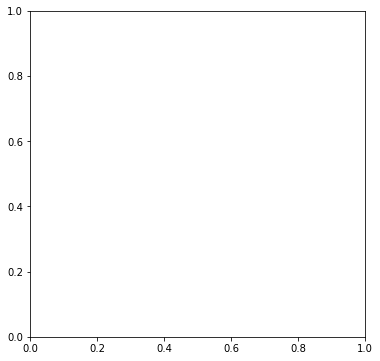

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(6, 6)

def init():
	ax.set_title("Particles in box")
	ax.set_ylabel('y')
	ax.set_xlabel('x')
	ax.scatter(R2[0,:,0], R2[0,:,1])
	ax.set_ylim([0,L])
	ax.set_xlim([0,L])

def animate(i):
	ax.cla()
	ax.set_ylim([0,L])
	ax.set_xlim([0,L])
	ax.scatter(R2[i,:,0], R2[i,:,1])

anim = FuncAnimation(fig, animate, init_func=init, frames=h, interval=50)
anim.save("figs/animation_images_test_Euler.mp4", writer='ffmpeg')

# Week 4

## Setting the initial velocities using Maxwell-Boltzmann distribution

### Derivation

The initial positions of the particles are chosen as a fcc lattice.\
\
The initial velocity of the particles are chosen as the Maxwell-Boltzmann distribution.\
The Maxwell boltzmann distribution is a Gaussian distribution, therefore it is in the order of
$$ \sim e^{-\frac{mv_{x,y,z}^2}{2k_\mathrm{B}T}}. $$
Previously the dimensionless units $\tilde{t}$, $\tilde{r}$ and $\tilde{U}$ have been defined as:
$$ t \equiv \sqrt{\frac{m \sigma^2}{\epsilon}}\tilde{t}, $$
$$ r \equiv \sigma \tilde{r}, $$
$$ U \equiv \epsilon \tilde{U}. $$
Inserting the previously defined dimensionless units into the Gaussian disstribution,
$$ e^{-\frac{mv_{x,y,z}^2}{2k_\mathrm{B} T}} = e^{-\frac{\epsilon \tilde{v}^2}{2 k_/\mathrm{B} T}} $$
with
$$v^2 = \left( \frac{dr}{dt} \right)^2  = \left( \frac{\sigma}{\sqrt{\frac{m \sigma^2}{\epsilon}}} \right)^2 \left( \frac{d \tilde{r}}{d \tilde{t}} \right)^2  = \frac{\epsilon}{m} \tilde{v}^2. $$
Therefore, the dimentionless unit $\tilde{T}$ is introduced, and defined as
$$ T \equiv \frac{\epsilon}{k_\mathrm{B}} \tilde{T}, $$
which gives the Gaussian distribution in dimensionless units as
$$ e^{-\frac{\tilde{v}^2}{2\tilde{T}}}. $$
As $\frac{\epsilon}{k_\mathrm{B}} = 119.8 \mathrm{K}$, room temperature ($T = 298.17\mathrm{K}$) is equal to $ \tilde{T} = 2.49 $.

$\textbf{Maxwell-Boltzmann distribution}:$\
$$ f_{\mathrm{Maxwell}}(v) = 4 \pi \left( \frac{m}{2 \pi k_\mathrm{B} T} \right) ^{\frac{3}{2}} v^2 e^{-\frac{m v_{x,y,z}^{2}}{2 k_\mathrm{B} T}} $$

$\textbf{Gaussian distribution}:$\
$$ f_{\mathrm{Gauss}}(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2} $$

$\textbf{In dimensionless units}:$
$$ -\frac{1}{2} \left( \frac{x- \mu}{\sigma} \right)^2 = -\frac{\tilde{v}^2}{2 \tilde{T}} $$
$$ \mu = 0 $$
$$ \sigma^2 = \tilde{T} $$
Now the Gaussian distribution is
$$ f(v) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2} = \frac{1}{\sqrt{2 \pi \tilde{T}}} e^{-\frac{\tilde{v}^2}{2 \tilde{T}}}, $$
and the Maxwell-Boltzmann distribution is
$$ f(v)dv = 4\pi \left( \frac{1}{2 \pi \tilde{T}} \right)^\frac{3}{2} \tilde{v}^2 e^{\frac{\tilde{v}^2}{2\tilde{T}}}d\tilde{v} $$

### Set parameters

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rnd


"""Adjustable variables"""
#Temparature [K]
T = 298.15
#Number of particles
N = 10000
#Number of spacial dimensions
D = 3
"""--------------------"""


'--------------------'

### Function to generate the initial velocities in three dimensions using Gaussian distribution

In [20]:
from numpy import random as rnd
def init_v_gauss(num_particles: int, temperature: float):
    """Function to generate the initial velocities for N particles in
    three spacial dimensions at a fixed temperature.
    
    Parameters
    ----------
    num_particles : int
        Number of particles in the system
    temperature : float
        Temperature of the system [K]
    
    Return
    ------
    init_v : np.ndarray
        The initial velocity vectors (stationary center of mass)
            Interpretation:
            Element (i,j) represents the velocity of particle i in dimension j
    """
    
    #Converting the temperature into dimensionless variable
    Dim_T = 199.8
    T_dim = temperature/Dim_T
    
    #The mean and standard deviation of the Baussian distribution
    mean = 0
    std = np.sqrt(T_dim)
    
    #Generating initial velocities
    init_velocity = rnd.normal(mean, std, size = (num_particles,3))
    
    #Adjusting the initial velocities to create a stationary center of mass
    Net_velocity = np.sum(init_velocity, axis=0)
    init_v = init_velocity - Net_velocity[np.newaxis,:]/num_particles
    
    return init_v

### Function to calculate the Maxwell-Boltzmann distribution

In [21]:
def MB_distribution(velocity: np.ndarray, temperature: float):
    """Function to calculate the Maxwell-Boltzmann distribution using
    dimensionless variables
    
    Parameters
    ----------
    velocity : np.ndarray
        velocity of a particle [dimensionless]
    temperature : float
        temperature of the system [K]
    
    Returns
    -------
    MB_dist : np.ndarray
        Maxwell-Boltzmann probability distribution at different velocities
    """
    
    #Dimentionless temperature
    Dim_T = 199.8
    T_dim = temperature/Dim_T
    
    MB_dist = 4* np.pi* (2* np.pi* T_dim)**(-3/2) * velocity**2 * np.exp(-velocity** 2/ (2* T_dim))
    
    return MB_dist


### Check to determine if the Gaussian distributions result in MB-distribution

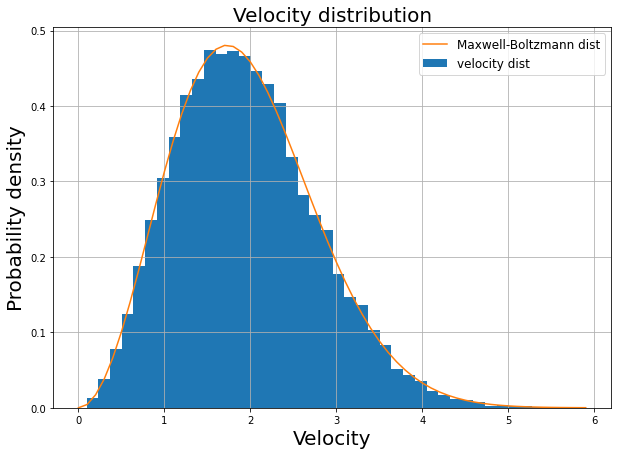

In [23]:
init_v = init_v_gauss(N,T)
new_value = init_v ** 2 @ np.ones([D,1])
bins = 40

v = np.arange(0,6,0.1)
MB_dist = MB_distribution(v,T)

plt.figure(figsize = (10, 7))
plt.hist(np.sqrt(new_value), bins, density = 'True', label='velocity dist')
plt.plot(v,MB_dist, label='Maxwell-Boltzmann dist')
plt.xlabel('Velocity',fontsize=20)
plt.ylabel('Probability density',fontsize=20)
plt.legend(fontsize='large')
plt.title('Velocity distribution',fontsize=20)
plt.grid()
#plt.savefig('figs/distribution.png')
plt.show()

It shows a Maxwell-Boltzmann distribution

$\textbf{Kinetic energy:}$\
$$ \left< K \right> = \frac{3}{2}k_B T (N-1) $$
$$ \left< \tilde{K} \right> = \frac{3}{2}\tilde{T}(N-1) $$

In [ ]:
print('velocity center of mass check')
print('-----------------------------')
print(np.sum(init_v, axis=0))
print('')
print('=============================')
print('')
Total_Kin_E = np.sum(new_value)/2
Calc_T = Total_Kin_E*2/3/(N-1)
print('Kinetic energy check')
print('-----------------------------')
print('Set temperature          =',T_dim)
print('Calculated temperature   =',Calc_T)

velocity center of mass check
-----------------------------
[-1.57207580e-13 -1.39488421e-12 -7.21020466e-13]


Kinetic energy check
-----------------------------
Set temperature          = 1.4923423423423423
Calculated temperature   = 1.4886438790101681


## Rescaling of the temperature

The initial positions of the particles are in a fcc lattice. The inital velocicies of the particles are in a Gaussian distribution in each dimension, creating a Maxwell-Boltzmann distribution for the absolute velocity.\
The simulation now has to run to reach an equilibrium for the kinetic and potential energy, after which the temperature of the system has to be determined, and the velocities of the particles have to be adusted to reach the intended temperature.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skeleton import *

### The rescaling factor of the velocities

After the system has found its equilibrium, the velocities have to be rescaled to addjust for the change in temperature ($\mathbf{v_i} = \lambda \mathbf{v_i}$), with the rescaling factor $\lambda$,
$$ \lambda = \sqrt{\frac{(N-1)3k_\mathrm{B}T}{\sum_\mathrm{i} m v_\mathrm{i}^2}}. $$
Converting to dimensionless variables,
$$ \lambda = \sqrt{\frac{(N-1)3\tilde{T}}{\sum_\mathrm{i}\tilde{v}^2}}. $$

In [ ]:
def scaling_fac(velocity: np.ndarray, temperature: float,num_particles: int):
    """Fuction to determine the scaling factor for the velocities of the individual 
    particles to adjust the temperature.
    
    Parameters
    ----------
    velocity : np.ndarray
        Matrix of the velocity elements of the individual particles with the element
        (i,j) the velocity of particle i in dimension j.
    temperature : float
        The intended temperature of the system
    num_particles : int
        The number of particles in the system
    
    Return
    ------
    scale_fac : float
        Scaling factor to adjust the velocities of the individual particles
    """
    
    #Converting the temperature into dimensionless variable
    Dim_T = 199.8
    T_dim = temperature/Dim_T
    
    #summing the modulus of velocity vectors of the individual particles
    sum_v = np.sum(velocity ** 2)
    
    #scaling factor
    scale_fac = np.sqrt((num_particles-1)*3*Dim_T/sum_v)
    
    return scale_fac

### Simulating the equilibrium of the system

Tasks:
 - Set initial conditions
 - Simulate the evolution of the system
 - Determine when equilibrium is reached
 - Apply scaling factor algorithm
 - Scaling velocitis
 - Repeat
 - Determine when the system has reached desired temperature

In [ ]:
import numpy as np
from skeleton import *
import matplotlib.pyplot as plt

"""Adjustable variables"""
#Temparature [K]
T = 298.15
#Number of particles
N = 108
#Number of spacial dimensions
D = 3
#Dimensions of the box (L x L x L)
L = 3*N**(1/3)
#Number of timesteps
h = 400
"""--------------------"""

#Number of unit cells in one dimension
num_unit_cell_1D = (N/4)**(1/3)
#The dimensions of a unit cell (alph x alph x alph)
alph = L/num_unit_cell_1D-0.01
#Ofset of the lattice
offset = 0


init_r = init_fcc(L, alph, offset)

N_new = init_r.shape[0]

init_v = init_v_gauss(N_new,T)


R, V = gen_rv_matrices(D, N_new, h)
R, V = store_rv(R, V, init_r, init_v, 0)


Determining the allowed number of atoms in the box, based on a 3D fcc lattace.

In [ ]:
max_unit_cells_1D = 14 #int
num_unit_cells_1D = np.arange(1,max_unit_cells_1D+1,1)
num_lattice_points_3D = num_unit_cells_1D**3 * 4
print('Allowed number of atoms')
print('-----------------------')
print(num_lattice_points_3D)
print('-----------------------')
print('')

Allowed number of atoms
-----------------------
[    4    32   108   256   500   864  1372  2048  2916  4000  5324  6912
  8788 10976]
-----------------------



N = 108
N_new = 108
L = 14.286609467713795
alpha = 4.752203155904598


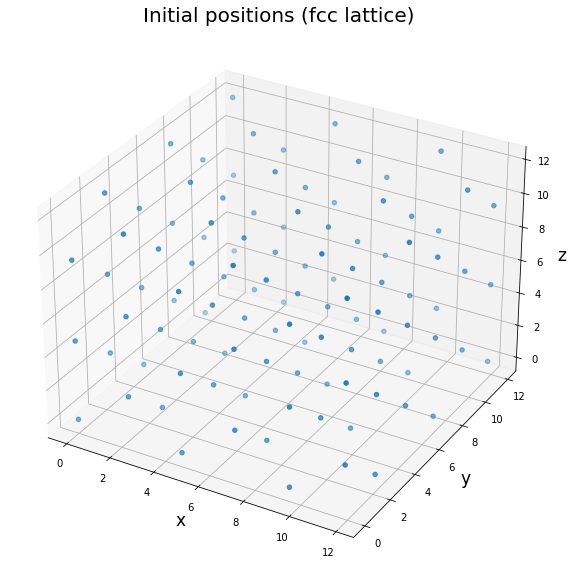

In [ ]:
print('N =',N)
print('N_new =',N_new)
print('L =',L)
print('alpha =',alph)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(init_r[:,0],init_r[:,1],init_r[:,2])
ax.set_xlabel('x',fontsize=17)
ax.set_ylabel('y',fontsize=17)
ax.set_zlabel('z',fontsize=17)
ax.set_title('Initial positions (fcc lattice)',fontsize=20)
plt.show()

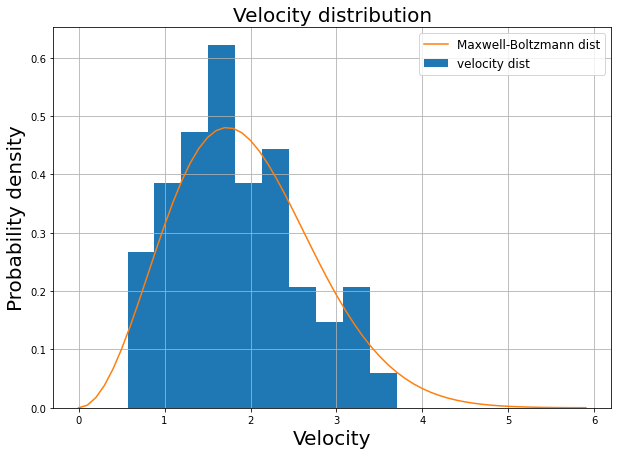

In [ ]:
new_value = init_v ** 2 @ np.ones([D,1])
bins = 10

v = np.arange(0,6,0.1)
MB_dist = MB_distribution(v,T)

plt.figure(figsize = (10, 7))
plt.hist(np.sqrt(new_value), bins, density = 'True', label='velocity dist')
plt.plot(v,MB_dist, label='Maxwell-Boltzmann dist')
plt.xlabel('Velocity',fontsize=20)
plt.ylabel('Probability density',fontsize=20)
plt.legend(fontsize='large')
plt.title('Velocity distribution',fontsize=20)
plt.grid()
plt.show()

Simulate the evolution of the system and determine when equilibrium is reached

In [ ]:
Rt, Vt, Ft, Pt = Verlet_integrate_images(N_new, R, V, 1, h, 0, L, D=3)

#### Find reason for ValueError

---------------------------------------------------------------------------\
ValueError                                Traceback (most recent call last)\
Input In [458], in <module>\
----> 1 Rt, Vt, Ft, Pt = Verlet_integrate_images(N_new, R, V, 1, h, 1, L, D=3)\
\
File ~/Project-1_SangersJeroen_agefrancke2_mwglorie/skeleton.py:308, in Verlet_integrate_images(N, r, v, m, h, Tend, L, D, timespacing)
-   306 forces = np.zeros((h,N,D))
-   307 potentials = np.zeros((h,N))
---> 308 lookup_arr = closest_images(r[0], L)
-   309 force, potential = image_forces_potentials(lookup_arr)
-   310 forces[0,:,:] = force\
\
File ~/Project-1_SangersJeroen_agefrancke2_mwglorie/skeleton.py:376, in closest_images(r, L)
-   373     min_dist = np.min(dimj_dist, axis=2)
-   375     mask = np.equal(dimj_dist, min_dist[:,:,nax])
---> 376     dimj_closest_dimi = poss_dimj_tiled[mask].reshape((part_amnt,part_amnt))
-   378     lookup_arr[dim, :, :] = dimj_closest_dimi
-   380 return lookup_arr
\
\
ValueError: cannot reshape array of size 12636 into shape (108,108)\

In [ ]:
#def closest_images(r: np.ndarray, L: float) -> np.ndarray:
"""Function that finds closest image particles corresponding to any original particle by treating the problem as a
series of 1D problems. For a thurough understanding look at 'images_closest_explanation.ipynb'.

Parameters
----------
r : np.ndarray
    array of particle positions for a single timestep
L : float
    Box size

Returns
-------
np.ndarray
    Lookup table of which image particles are closest to any given particle.
    An D X N X N matrix (with D representing number of dimensions and N the number of particles

    Intrepetation:
    Element (i,j,k) represents the location of particle k closest to particle j for dimension i

Note
----
Maybe include potential energy calculation in this function, as it already calculates the
minimum distance between the particles
"""

r = R[0]

part_amnt, dims = r.shape
nax = np.newaxis #don't complain

lookup_arr = np.zeros((dims, part_amnt, part_amnt))

for dim in range(dims):

    dim_coord = r[:,dim]
    dim_minor_im = dim_coord - L
    dim_major_im = dim_coord + L

    poss_dimj = np.column_stack((dim_minor_im,
                                dim_coord,
                                dim_major_im
                                )
    )

    poss_dimj_tiled = np.tile(poss_dimj, (part_amnt, 1, 1))
    poss_dimj_tiled_diff = poss_dimj_tiled - dim_coord[:, nax, nax]
    dimj_dist = poss_dimj_tiled_diff**2
    min_dist = np.min(dimj_dist, axis=2)

    mask = np.equal(dimj_dist, min_dist[:,:,nax])
    dimj_closest_dimi = poss_dimj_tiled[mask].reshape((part_amnt,part_amnt))

    lookup_arr[dim, :, :] = dimj_closest_dimi

    #return lookup_arr

ValueError: cannot reshape array of size 12636 into shape (108,108)

In [ ]:
print(np.shape(poss_dimj_tiled))
print(np.shape(poss_dimj_tiled_diff))
print(np.shape(dimj_dist))
print(np.shape(min_dist))
print(np.shape(mask))
print(np.shape(dimj_closest_dimi))
print('--------------------------')
print('Should have lenght of 11664')
print(np.shape(poss_dimj_tiled[mask]))

(108, 108, 3)
(108, 108, 3)
(108, 108, 3)
(108, 108)
(108, 108, 3)
(3, 3)
--------------------------
Should have lenght of 11664
(12636,)


In [ ]:
print(mask[0,:,:])

[[False  True False]
 [False  True False]
 [False  True False]
 [False  True False]
 [False  True False]
 [False  True False]
 [ True False False]
 [ True False False]
 [ True False False]
 [False  True False]
 [False  True False]
 [False  True False]
 [False  True False]
 [False  True False]
 [False  True False]
 [ True False False]
 [ True False False]
 [ True False False]
 [False  True False]
 [False  True False]
 [False  True False]
 [False  True False]
 [False  True False]
 [False  True False]
 [ True False False]
 [ True False False]
 [ True False False]
 [False  True False]
 [False  True False]
 [False  True False]
 [ True  True False]
 [ True  True False]
 [ True  True False]
 [ True False False]
 [ True False False]
 [ True False False]
 [False  True False]
 [False  True False]
 [False  True False]
 [ True  True False]
 [ True  True False]
 [ True  True False]
 [ True False False]
 [ True False False]
 [ True False False]
 [False  True False]
 [False  True False]
 [False  True

$\textbf{Awnser:}$\
Due to the fcc lattice of the initial position the function closest_images did not work. If the system is a perfect lattice, it will count identical particles both inside the box and outside the box as closest, which will result in a total number of counted particles > $108^2 = 11667$.\
A possible solution could be that we create an imperfect lattace.\
(Maybe only counting particles that are at a distance less than L/2 from the considered particle could be an option)

#### Continue with imperfect lattace

Text(0.5, 0.92, 'Trajectory of single particle')

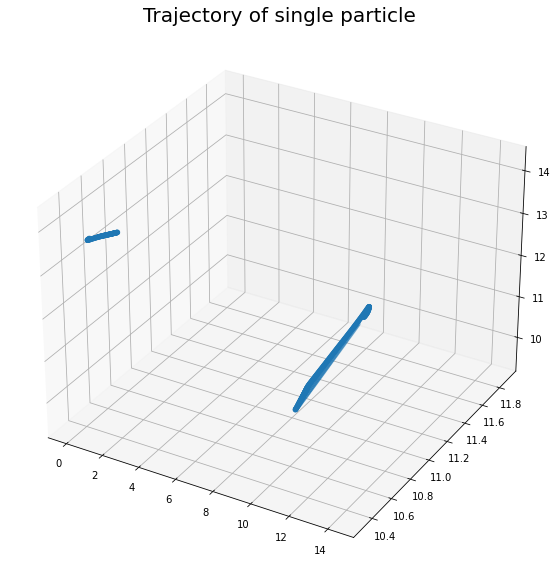

In [ ]:
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.gca(projection='3d')
ax.scatter(Rt[:,50,0], Rt[:,50,1], Rt[:,50,2])
ax.set_title('Trajectory of single particle',fontsize=20)

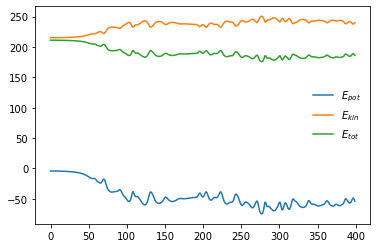

In [ ]:
Kt = particle_E_kin(Vt)
tot_energy = np.sum(Kt, axis=(2,1)) + np.sum(Pt, axis=1)

plt.plot(np.sum(Pt, axis=1), label=r'$E_{pot}$')
plt.plot(np.sum(Kt, axis=(2,1)), label=r"$E_{kin}$")
plt.plot(tot_energy, label=r"$E_{tot}$")
plt.legend(frameon=False)
plt.show()

It appears as if the total energy is not conserved

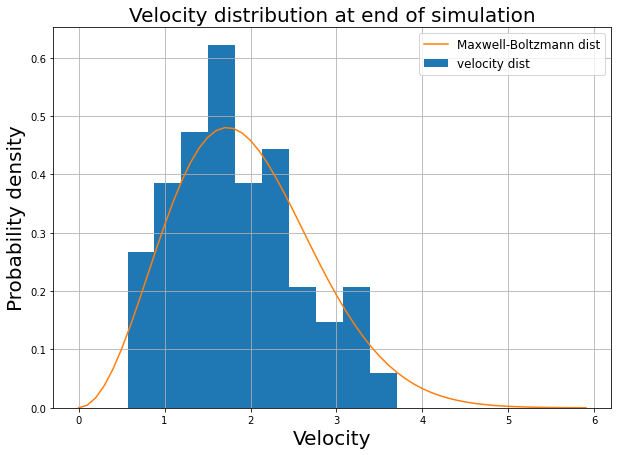

In [ ]:
new_value = Vt[-0,:,:] ** 2 @ np.ones([D,1])
bins = 10

v = np.arange(0,6,0.1)
MB_dist = MB_distribution(v,T)

plt.figure(figsize = (10, 7))
plt.hist(np.sqrt(new_value), bins, density = 'True', label='velocity dist')
plt.plot(v,MB_dist, label='Maxwell-Boltzmann dist')
plt.xlabel('Velocity',fontsize=20)
plt.ylabel('Probability density',fontsize=20)
plt.legend(fontsize='large')
plt.title('Velocity distribution at end of simulation',fontsize=20)
plt.grid()
plt.show()

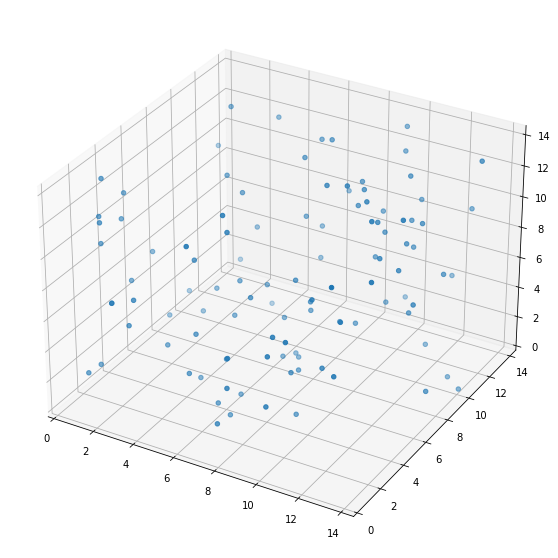

In [ ]:
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.gca(projection='3d')

def init():
	ax.set_title("Particles in box")
	ax.set_ylabel('y')
	ax.set_xlabel('x')
	ax.scatter(Rt[0,:,0], Rt[0,:,1], Rt[0,:,2])
	ax.set_ylim([0,L])
	ax.set_xlim([0,L])
	ax.set_zlim([0,L])

def animate(i):
	ax.cla()
	ax.set_ylim([0,L])
	ax.set_xlim([0,L])
	ax.set_zlim([0,L])
	ax.scatter(Rt[i,:,0], Rt[i,:,1], Rt[i,:,2])

anim = FuncAnimation(fig, animate, init_func=init, frames=h, interval=50)
anim.save("figs/animation_fcc_MB_distribution_1.mp4".format(N), writer='ffmpeg')

## Observables

### Pressure

The pressure of the system is calculated using

$$ \frac{\beta P}{\rho} = 1 - \frac{\beta}{3N} \left< \frac{1}{2} \sum_{i,j} r_{ij} \frac{\partial U}{\partial r_{ij}} \right> , \qquad \beta = \frac{1}{k_\mathrm{B} T} = \frac{1}{\epsilon \tilde{T}}$$

Using the dimensionless units

$$ t \equiv \sqrt{\frac{m \sigma^2}{\epsilon}}\tilde{t}, \qquad r \equiv \sigma \tilde{r}, \qquad U \equiv \epsilon \tilde{U}, \qquad T \equiv \frac{\epsilon}{k_\mathrm{B}} \tilde{T} $$

Order of magnitude of dimensionless units

$$ \sqrt{\frac{m \sigma^2}{\epsilon}} = 2.156 \cdot 10^{-12} \mathrm{s}, \qquad \sigma = 3.405 \cdot 10^{-10} \mathrm{m}, \qquad \epsilon = 1.654\cdot 10^{-21} \mathrm{J}, \qquad \frac{\epsilon}{k_\mathrm{B}} = 119.8 \mathrm{K} $$

Converting to dimensionless units

$$ 1 - \frac{\beta}{3N} \left< \frac{1}{2} \sum_{i,j} r_{ij} \frac{\partial U}{\partial r_{ij}} \right> = 1 - \frac{1}{3 N \tilde{T}} \left< \frac{1}{2} \sum_{i,j} \tilde{r}_{ij} \frac{\partial \tilde{U}}{\partial \tilde{r}_{ij}}\right> $$

$$ P = \frac{F}{A} = \frac{m}{A} \frac{d^2 r}{dt^2} = \frac{\epsilon}{\sigma^3} \tilde{P}$$

$$ \frac{\epsilon}{\sigma^3} = 4.190 \cdot 10^7 \, \mathrm{Pa}$$

$$ \rho = \frac{N}{V} = \frac{1}{\sigma^3} \frac{N}{\tilde{V}} $$

$$ \frac{\beta P}{\rho} = \frac{P}{k_\mathrm{B} T \rho} = \frac{\tilde{P} \tilde{V}}{\tilde{T} N} $$

$$ \frac{\tilde{P} \tilde{V}}{\tilde{T} N} = 1 - \frac{1}{3 N \tilde{T}} \left< \frac{1}{2} \sum_{i,j} \tilde{r}_{ij} \frac{\partial \tilde{U}}{\partial \tilde{r}_{ij}}\right> $$


In [591]:
"""Calculating epsilon/sigma^3"""
sig = 3.405 #sigma [A]
Ang = 1e-10 #Angstrom [m]
kB = 1.38064852e-23 #Boltzmann constant [J/K]
eps_kB = 119.8 #epsilon/k_B [K]

d = sig*Ang # [m]
eps = eps_kB*kB # J

sol = eps/d**3 # [Pa]
print(sol)

41897547.40302599


# Week 5

## Data blocking

$$ a_i = \frac{1}{b} \sum^{i \ast b}_{(i-1) \ast b + 1} A_i $$

$$ N_b = \frac{N}{b} $$

In [594]:
from skeleton import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, writers

In [644]:
D = 3 # number of dimentions

L = 3.90001 # size of the square box the particles are simulated in

offset = np.asarray([1,1,1]) * 0.1
temp = 298.15

r0, v0 = init_fcc(L, 1.3, offset, temp)

N = r0.shape[0]

In [618]:
R, V, pott, r1, v1 = equalise_system(r0, v0, temp, L)

[154.65987018 151.11240726 172.17216181 179.09255221 147.64607302
 137.39635192 155.77216112 178.08075834 172.37755561 144.98364055]
1.434028908955553
234.49654024161123
1.1639744792800595
276.547095579905
1.0110093889451166
281.8275219175068
1.0572266719035188
296.37154152913337


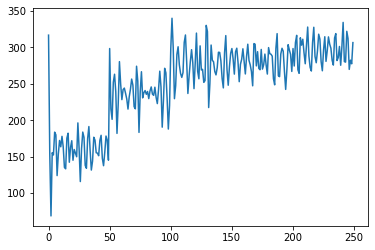

In [619]:
plt.plot(system_temperature(V))
plt.show()

In [622]:
print(np.shape(R))
print(N)
print('-------------------')
print()
print(r1[0,:])
print(R[:,0,0])

(250, 108, 3)
108
-------------------

[0.10981617 0.09105599 0.09110488]
[0.1        0.09994738 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.07584711 0.09334104 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.     

$\textbf{This is incorrect, something is going wrong!!!!!}$

### The output of R for the function equalize_system is incorrect (find reason)

The function equalize_system only stored the first step value, all the other calculated values were not stored per loop in the while loop.


The function in question

In [639]:
# Everything with #!!!!! [text] !!!!! has been added with respect to the original code
#def equalise_system_check(
#    r0: np.ndarray,
#    v0: np.ndarray,
#    desired_temperature: float,
#    system_size: float,
#    grace_time: int=50,
#    error: float=5.0
#    ) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]:

# !!!!!
desired_temperature = temp
system_size = L
grace_time = 50
error = 5.0
# !!!!!

(num, dim) = r0.shape
L = system_size

R, V = gen_rv_matrices(dim, num, grace_time)
R, V = store_rv(R, V, r0, v0, 0)

Rt, Vt, trsh, pot = Verlet_integrate_images(num, R, V, 1, grace_time, 0, system_size, D=3)
temp = system_temperature(Vt[-10:])
print(temp)
temp_average = np.average(temp)

R = Rt        #!!!!! Added !!!!!
V = Vt        #!!!!! Added !!!!!

v0 = Vt[-1].copy()
r0 = Rt[-1].copy()
n = 0
while np.abs(temp_average - desired_temperature) >= error:
    rescale = scaling_fac(v0, desired_temperature, num)
    print(rescale)
    v0 *= rescale

    RN, VN = gen_rv_matrices(dim, num, grace_time)
    RN, VN = store_rv(RN, VN, r0, v0, 0)
    RNt, VNt, trsh, pott = Verlet_integrate_images(num, RN, VN, 1, grace_time, 0, system_size, D=3)

    R = np.append(R, RNt, axis=0)        #!!!!! changed RN into RNt !!!!!
    V = np.append(V, VNt, axis=0)        #!!!!! changed VN into VNt !!!!!
    pot = np.append(pot, pott, axis=0)
    temp = system_temperature(VNt[-10:])
    temp_average = np.average(temp)
    print(temp_average)
    v0 = VNt[-1].copy()
    r0 = RNt[-1].copy()

#return R, V, pot, r0, v0

[180.05256868 165.37525656 153.56260775 161.25307426 160.31546
 176.22811728 172.51271765 144.61317349 157.30508723 168.49089862]
1.3302374906464096
231.22894110194935
1.1333311539874924
262.6097485211801
1.0170318607428266
269.33573590981104
1.0676452149714546
291.76677427271414
0.9824850325458679
284.4395847397689
1.078805901185468
304.27695388275606
1.000954371691032
301.76814577540847


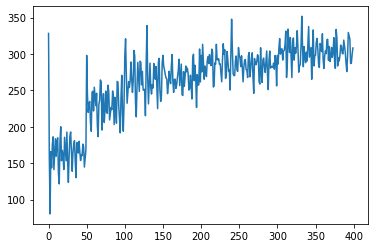

[0.0848735  0.13355511 0.15605508]
[0.1        0.09796942 0.09960397 0.10706194 0.11891271 0.13127619
 0.13761561 0.13084844 0.1163172  0.10532213 0.0964541  0.08286368
 0.06413499 0.04997193 0.05335018 0.07599442 0.10668479 0.13087231
 0.13775887 0.1280881  0.11650422 0.11481491 0.11376722 0.1029717
 0.08723385 0.07670632 0.07807657 0.09180126 0.10862201 0.11277177
 0.10025349 0.0839961  0.07895699 0.08998703 0.10881421 0.12512877
 0.13160061 0.12465798 0.10581147 0.08375177 0.07041665 0.0743384
 0.0940411  0.11235364 0.11172703 0.09805833 0.08974073 0.09560763
 0.11068997 0.121468   0.121468   0.11978674 0.10921986 0.10422723
 0.10773547 0.10698384 0.09403117 0.07756581 0.06961276 0.07856412
 0.10021249 0.11522464 0.10868959 0.0870684  0.07296339 0.08820544
 0.12735795 0.15397478 0.14356966 0.11464327 0.08881313 0.07847249
 0.08399856 0.0942143  0.09673928 0.08920898 0.08216765 0.08569884
 0.09940591 0.11225759 0.11416647 0.10295798 0.08788616 0.08178669
 0.09258649 0.11287958 0.1231

In [643]:
plt.plot(system_temperature(V))
plt.show()
print(R[-1,0,:])

### Alter equalize_system so it will continue calculations after finding equilibrium

After finding the equilibrium, set the last values to as the new initail values

Suggested altered function for equalise_system\
\
Added the alterations shown in "The output of R for the function equalize_system is incorrect"\
\
Furthermore, added an parameter called num_time_steps. This parameter will determine how many time steps will be made after equilibrium has been achiefed.

In [646]:
def equalise_system_new(
    r0: np.ndarray,
    v0: np.ndarray,
    desired_temperature: float,
    system_size: float,
    num_time_steps: int=300,
    grace_time: int=50,
    error: float=5.0
    ) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray, int]:

    (num, dim) = r0.shape
    L = system_size

    R, V = gen_rv_matrices(dim, num, grace_time)
    R, V = store_rv(R, V, r0, v0, 0)

    Rt, Vt, trsh, pot = Verlet_integrate_images(num, R, V, 1, grace_time, 0, system_size, D=3)
    temp = system_temperature(Vt[-10:])
    print(temp)
    temp_average = np.average(temp)
    
    R = Rt
    V = Vt

    v0 = Vt[-1].copy()
    r0 = Rt[-1].copy()
    start_time = 0
    num_of_iterations = 0
    while np.abs(temp_average - desired_temperature) >= error:
        rescale = scaling_fac(v0, desired_temperature, num)
        print(rescale)
        v0 *= rescale

        RN, VN = gen_rv_matrices(dim, num, grace_time)
        RN, VN = store_rv(RN, VN, r0, v0, 0)
        RNt, VNt, trsh, pott = Verlet_integrate_images(num, RN, VN, 1, grace_time, 0, system_size, D=3)

        R = np.append(R, RNt, axis=0)
        V = np.append(V, VNt, axis=0)
        pot = np.append(pot, pott, axis=0)
        temp = system_temperature(VNt[-10:])
        temp_average = np.average(temp)
        print(temp_average)
        v0 = VNt[-1].copy()
        r0 = RNt[-1].copy()
        start_time = start_time + num_of_iterations*grace_time
        num_of_iterations = num_of_iterations + 1

    r0_new = R[-1,:,:]
    v0_new = V[-1,:,:]
    R_new, V_new = gen_rv_matrices(dim, num, num_time_steps)
    R_new, V_new = store_rv(R_new, V_new, r0_new, v0_new, 0)

    R_new, V_new, Force, Pot = Verlet_integrate_images(num, R_new, V_new, 1, num_time_steps, 0, system_size, D=3)

    R = np.append(R, R_new, axis=0)
    V = np.append(V, V_new, axis=0)
    pot = np.append(pot, Pot, axis=0)
    r0 = R[-1].copy()
    v0 = V[-1].copy()

    return R, V, pot, r0, v0, start_time

In [649]:
R, V, pott, r1, v1, t_start = equalise_system_new(r0, v0, temp, L)

[155.75068036 138.01501151 150.78335868 171.22176896 141.08246291
 131.85685799 145.8765137  151.40408971 169.49624002 147.49150017]
1.4217849420541409
223.36223979243704
1.208630323635901
277.0668564455371
1.001093712042413
276.5067523576869
1.0777140702023238
293.3180849065351


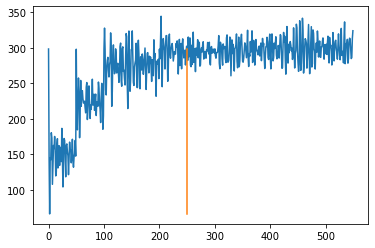

In [653]:
plt.plot(system_temperature(V))
plt.plot([t_start-50,t_start-50],[np.min(system_temperature(V)),system_temperature(V[t_start,:,:])])
plt.show()

In [654]:
R_test, V_test, pott_test, r1_test, v1_test = equalise_system(r0, v0, temp, L)

[155.75068036 138.01501151 150.78335868 171.22176896 141.08246291
 131.85685799 145.8765137  151.40408971 169.49624002 147.49150017]
1.4217849420541409
223.36223979243704
1.208630323635901
277.0668564455371
1.001093712042413
276.5067523576869
1.0777140702023238
293.3180849065351


In [661]:
print(pott_test == pott[:(t_start-50),:])

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


$\textbf{The two functions give identical results with identical initial conditions}$

### Testing if the system is time reversible

In [ ]:
r_0new = R[-1,:,:]
v_0new = -V[-1,:,:]

num_part, dim = np.shape(r_0new)

h = 300
R_rev, V_rev = gen_rv_matrices(dim, num_part, h)
R_rev, V_rev = store_rv(R_rev, V_rev, r_0new, v_0new, 0)

R_rev, V_rev, F_rev, pot_rev = Verlet_integrate_images(num_part, R_rev, V_rev, 1, h, 0, L)


In [689]:
n = 1

r_end_new = R_rev[n,:,:]
v_end_new = V_rev[n,:,:]

print('r0')
print(r_end_new == R[(-1-n),:,:])
print('-------------------------')
#print()
#print('v0')
#print(v_end_new == V[(-1-n),:,:])

r0
[[False  True  True]
 [ True  True  True]
 [ True False  True]
 [ True  True False]
 [ True  True  True]
 [False  True  True]
 [ True  True  True]
 [ True False  True]
 [ True False  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True False False]
 [ True False  True]
 [ True  True  True]
 [ True  True False]
 [False False  True]
 [False False False]
 [False  True  True]
 [ True False  True]
 [ True  True  True]
 [ True False  True]
 [False  True  True]
 [ True  True False]
 [ True  True False]
 [ True False  True]
 [ True  True False]
 [False False False]
 [False  True False]
 [ True  True  True]
 [False  True False]
 [False  True False]
 [ True  True False]
 [ True  True False]
 [False  True  True]
 [False  True False]
 [ True  True  True]
 [ True  True  True]
 [False False False]
 [False  True  True]
 [ True False False]
 [ True  True  True]
 [ True  True  True]
 [False  True  True]
 [ True  T

In [672]:
print(t_start-50)
print(np.shape(R))

250
(550, 108, 3)


### Data blocking

In [668]:
RN = R[(t_start-50):,:,:]
VN = V[(t_start-50):,:,:]
PN = pott[(t_start-50):,:]

In [669]:
def data_blocking(A: np.ndarray, max_bins: int=10):
    t_steps, num_particles = np.shape(A)
    b_max = np.round(t_steps/int, decimals=0)
    b = np.arange([1, t_steps, 1], dtype=int)
    np.linspace(1,t_steps,max_bins)

(300, 108, 3)
300


## Realistic values for volume, number of particles and temperature of an ideal gas

Dimensionless variables:
$$ T \equiv \frac{\epsilon}{k_\mathrm{B}} \tilde{T}, \quad V \equiv \sigma^3 \tilde{V}, \quad \frac{\epsilon}{\sigma^3} \tilde{P} $$
Ideal gas law:
$$ P V = N k_\mathrm{b} T \longrightarrow \tilde{P} \tilde{V} = N \tilde{T} $$

Properties of argon at different phases\
$40 \, \mathrm{g \, mol^{-1}}$

| Phase ||$T\, [K]$ | $\rho \, [\mathrm{g\, L^{-1}}]$| $P\, [\mathrm{bar}]$|$n\, [\mathrm{m}^{-3}]$ | $\tilde{n}\, [-]$     |
|-------||----------|---------------|--------------------|------------------------ |-----------------------|
| Ag(s) || 83.81    | $1650$        | $1$                | $2.484 \cdot 10^{28}$   | $0.981$               |
| Ag(l) || 87.302   | $1398.3$      | $1$                | $2.105 \cdot 10^{28}$   | $0.831$               |
| Ar(g) || 273.15   | $1.664$       | $1$                | $2.505 \cdot 10^{25}$   | $9.889 \cdot 10^{-4}$ |

### The particle density according to our simulation

In [791]:
import numpy as np
import matplotlib.pyplot as plt
from skeleton import *

"""Setting parameters"""
"""------------------"""

"Dimensionless constants"
dim_temp = 119.8
sigma = 3.405e-10
k_B = 1.3806e-23
epsilon = dim_temp*k_B
dim_press = epsilon/sigma**3

"Number of particles"
Min_unit_cell = 1
Max_unit_cell = 4
d_unit_cell = 1
num_part = np.arange(Min_unit_cell, Max_unit_cell+d_unit_cell, d_unit_cell)**3 * 4

"Volume"
"volume is determined based on the number of particles"
vol = 3*num_part**(1/3)

n = num_part/vol

print(n)

[ 0.83994737  3.35978947  7.5595263  13.43915787]


Particle denisty increases

### The pressure of an ideal gas according to our simulation

In [782]:
import numpy as np
import matplotlib.pyplot as plt
from skeleton import *

"""Setting parameters"""
"""------------------"""

"Dimensionless constants"
dim_temp = 119.8
sigma = 3.405e-10
k_B = 1.3806e-23
epsilon = dim_temp*k_B
dim_press = epsilon/sigma**3

"Temperature"
Min_temp = 100
Max_temp = 400
d_temp = 10
temp = np.arange(Min_temp, Max_temp+d_temp, d_temp)/dim_temp

"Number of particles"
Min_unit_cell = 1
Max_unit_cell = 4
d_unit_cell = 1
num_part = np.arange(Min_unit_cell, Max_unit_cell+d_unit_cell, d_unit_cell)**3 * 4

"Volume"
"volume is determined based on the number of particles"
vol = 3*num_part**(1/3)

i_num_part = np.size(num_part)
i_temp = np.size(temp)

T = np.ones([i_num_part,1]) @ temp[np.newaxis,:]
N = num_part[:,np.newaxis] @ np.ones([1,i_temp])
V = vol[:,np.newaxis] @ np.ones([1,i_temp])

"particle density"
n = num_part/vol
print(n)

[ 0.83994737  3.35978947  7.5595263  13.43915787]


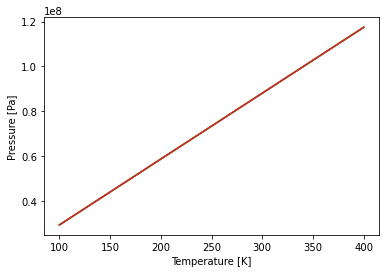

In [753]:
"""Pressure according to ideal gas law"""
P = N* T/ V

real_T = T* dim_temp
real_V = V* sigma**3
real_P = P* dim_press

plt.figure()
for i in range(i_num_part):
    plt.plot(real_T[0,:],real_P[0,:])
plt.xlabel('Temperature [K]')
plt.ylabel('Pressure [Pa]')
plt.show()

$\textbf{The pressure is much too high!!!!!!!!!}$

Although this is not the proper way to calculate the pressure

### Argon as an ideal gas according to theory

What should the particle density $n = \left[ \mathrm{m}^{-3} \right]$ be according to the ideal gas law at different conditions?\

$$ n = \frac{N}{V} = \frac{P}{k_\mathrm{B} T} \quad \longrightarrow \quad \tilde{n} = \frac{N}{\tilde{V}} = \frac{\tilde{P}}{\tilde{T}} $$

In [788]:
import numpy as np
import matplotlib.pyplot as plt
from skeleton import *

"""Setting parameters"""
"""------------------"""

"Dimensionless constants"
dim_temp = 119.8
sigma = 3.405e-10
k_B = 1.3806e-23
epsilon = dim_temp*k_B
dim_press = epsilon/sigma**3
"-----------------------"

"pressure [bar]"
min_press = 0.6
max_press = 2
d_press = 0.2
press = np.arange(min_press, max_press+d_press, d_press)
i_press = np.size(press)

"temperature [K]"
min_temp = 100
max_temp = 300
d_temp = 20
temp = np.arange(min_temp, max_temp+d_temp, d_temp)
i_temp = np.size(temp)

"particle density [m^-3]"
"[i,j] = [i_temp,i_press]"
dens = 1/(temp[:,np.newaxis]*k_B) @ press[np.newaxis,:]

"Dimensionless units"
P = press/dim_press
T = temp/dim_temp
n = 1/(T[:,np.newaxis]) @ P[np.newaxis,:]
n_dens = dens*sigma**3

print(n[:,0])
print(n_dens[:,0])


[1.71567384e-08 1.42972820e-08 1.22548132e-08 1.07229615e-08
 9.53152135e-09 8.57836921e-09 7.79851747e-09 7.14864101e-09
 6.59874555e-09 6.12740658e-09 5.71891281e-09]
[1.71567384e-08 1.42972820e-08 1.22548132e-08 1.07229615e-08
 9.53152135e-09 8.57836921e-09 7.79851747e-09 7.14864101e-09
 6.59874555e-09 6.12740658e-09 5.71891281e-09]


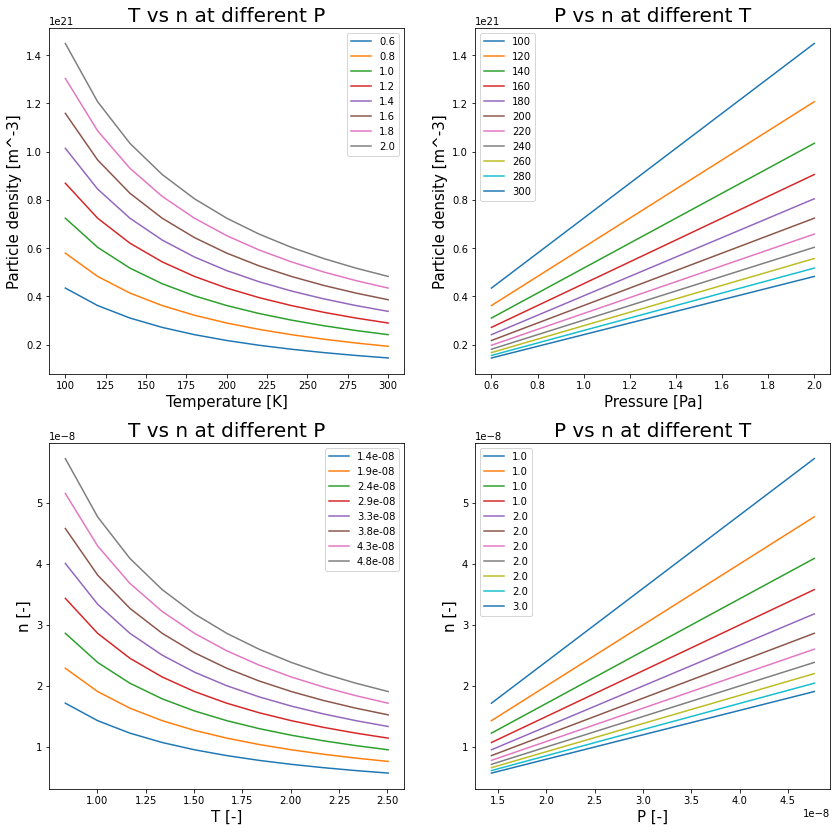

In [785]:
plt.figure(figsize=(14,14))

plt.subplot(221)
for i in range(i_press):
    plt.plot(temp[:,],dens[:,i],label=np.round(press[i],1))
plt.xlabel('Temperature [K]',size=15)
plt.ylabel('Particle density [m^-3]',size=15)
plt.title('T vs n at different P',size=20)
plt.legend()

plt.subplot(222)
for i in range(i_temp):
    plt.plot(press[:],dens[i,:],label=np.round(temp[i]))
plt.xlabel('Pressure [Pa]',size=15)
plt.ylabel('Particle density [m^-3]',size=15)
plt.title('P vs n at different T',size=20)
plt.legend()

plt.subplot(223)
for i in range(i_press):
    plt.plot(T[:,],n[:,i],label=np.round(P[i],9))
plt.xlabel('T [-]',size=15)
plt.ylabel('n [-]',size=15)
plt.title('T vs n at different P',size=20)
plt.legend()

plt.subplot(224)
for i in range(i_temp):
    plt.plot(P,n[i,:],label=np.round(T[i]))
plt.xlabel('P [-]',size=15)
plt.ylabel('n [-]',size=15)
plt.title('P vs n at different T',size=20)
plt.legend()

plt.show()

According to this, our simulation should have a box size that corresponds to a dimensionless particle density of $\sim 10^{-8}$. This is very low, the integration time will become increadibly long.

### Determining volume for realistic particle density for different phases

$$ n = \frac{N}{V} = \frac{P}{k_\mathrm{B} T} \quad \longrightarrow \quad \tilde{n} = \frac{N}{\tilde{V}} = \frac{\tilde{P}}{\tilde{T}} $$

Properties of argon at different phases\
$40 \, \mathrm{g \, mol^{-1}}$

| Phase ||$T\, [K]$ | $\rho \, [\mathrm{g\, L^{-1}}]$| $P\, [\mathrm{bar}]$|$n\, [\mathrm{m}^{-3}]$ | $\tilde{n}\, [-]$     |
|-------||----------|---------------|--------------------|------------------------ |-----------------------|
| Ag(s) || 83.81    | $1650$        | $1$                | $2.484 \cdot 10^{28}$   | $0.981$               |
| Ag(l) || 87.302   | $1398.3$      | $1$                | $2.105 \cdot 10^{28}$   | $0.831$               |
| Ar(g) || 273.15   | $1.664$       | $1$                | $2.505 \cdot 10^{25}$   | $9.889 \cdot 10^{-4}$ |

In [842]:
def cell_volume(num_par: int, phase: str, temp = 273.15) -> float:
    """Function to determine the volume of the cell for different phases based on
    the particle density from literature.

    Parameters
    ----------
    temp: float
        temperature of the system [K]
    num_par: int
        number of particles in the cell
    phase:
        The phase of the system.
        Input can either be s (solid), l (liquid), g (gas)

    Return
    ------
    volume: float
        Volume of the cell according to the literature

    Notes
    -----
    Properties of argon at different phases according to literature.
    Molar mass of argon: 40 g/mol
    T: temperature, P: pressure, rho: density, n: particle density, n': dimensionless n

     phase || T [K]  | P [bar] | rho [g/L] | n [m^-3] | n' [-]
    -------||--------|---------|-----------|----------|----------
     Ag(s) || 83.81  | 1       | 1650      | 2.484e28 | 0.981
     Ag(l) || 87.302 | 1       | 1398.3    | 2.105e28 | 0.831
     Ar(g) || 273.15 | 1       | 1.664     | 2.505e25 | 9.889e-4

    The volume is determined based on the particle density from literature. It is assumed
    that the particle density does not change at different conditions for both the solid
    and gas phase. The particle density is epected to change at different conditions for
    the gas phase. An ideal gas model is assumed for the gas phase,
                            PV = NkT ------> n = N/V = P/(kT)
    Therefore the particle density n(T) at temperature T is calculated from the particle
    density from literature n(T_0) at the temperature from literature T_0.
                                n(T) = n(T_0) * T_0 / T

    !!!-------------------------------------------------------------------------------!!!
    The calculations are performed in dimensionless units and the volume is calculated
    in dimensionless units
    !!!-------------------------------------------------------------------------------!!!
    """

    "constants"
    T_dim = 119.8
    n_sol = 0.981
    n_liq = 0.831
    n_gas = 9.889e-4
    temp_gas = 273.15

    T_gas = temp_gas/T_dim
    T = temp/T_dim

    if phase == 's':
        volume = num_par/n_sol
    elif phase == 'l':
        volume = num_par/n_liq
    elif phase == 'g':
        n = n_gas* T_gas/ T
        volume = num_par/n
    else:
        raise ValueError('phase not/incorrect defined. Acceptable values are string values {s, l, g}')

    return volume

In [843]:
"""Test fuction at different particle numbers and compair with previous volume"""
N = np.arange(1,6,1)**3* 4
V_solid = cell_volume(N, 's')
V_liquid = cell_volume(N, 'l')
V_gas = cell_volume(N, 'g')
V_old = 3* N**(1/3)

print('Volumes for different particle numbers')
print('--------------------------------------')
print('Solid')
print(V_solid**(1/3))
print()
print('Liquid')
print(V_liquid**(1/3))
print()
print('Gas')
print(V_gas**(1/3))
print()
print('Previously calculated volume')
print(V_old)

Volumes for different particle numbers
--------------------------------------
Solid
[1.59758385 3.1951677  4.79275155 6.3903354  7.98791924]

Liquid
[1.68844268 3.37688537 5.06532805 6.75377073 8.44221342]

Gas
[15.93318278 31.86636555 47.79954833 63.73273111 79.66591388]

Previously calculated volume
[ 4.76220316  9.52440631 14.28660947 19.04881262 23.81101578]


### Implementing new equation for cell volume with init_fcc

In [852]:
def cell_dim(num_par: int, phase = '', temp = 273.15) -> float:
    """Function to determine the size of the cell and the length of the lattice
    vectors for different phases based on the particle density from literature.

    Parameters
    ----------
    temp: float
        temperature of the system [K]
    num_par: int
        number of particles in the cell
    phase:
        The phase of the system.
        Input can either be s (solid), l (liquid), g (gas)

    Return
    ------
    L: float
        Size of the cell according to the literature
    alpha: float
        Lenght of the lattice vectors

    Notes
    -----
    Properties of argon at different phases according to literature.
    Molar mass of argon: 40 g/mol
    T: temperature, P: pressure, rho: density, n: particle density, n': dimensionless n

     phase || T [K]  | P [bar] | rho [g/L] | n [m^-3] | n' [-]
    -------||--------|---------|-----------|----------|----------
     Ag(s) || 83.81  | 1       | 1650      | 2.484e28 | 0.981
     Ag(l) || 87.302 | 1       | 1398.3    | 2.105e28 | 0.831
     Ar(g) || 273.15 | 1       | 1.664     | 2.505e25 | 9.889e-4

    The volume is determined based on the particle density from literature. It is assumed
    that the particle density does not change at different conditions for both the solid
    and gas phase. The particle density is epected to change at different conditions for
    the gas phase. An ideal gas model is assumed for the gas phase,
                            PV = NkT ------> n = N/V = P/(kT)
    Therefore the particle density n(T) at temperature T is calculated from the particle
    density from literature n(T_0) at the temperature from literature T_0.
                                n(T) = n(T_0) * T_0 / T

    !!!-------------------------------------------------------------------------------!!!
    The calculations are performed in dimensionless units and the volume is calculated
    in dimensionless units
    !!!-------------------------------------------------------------------------------!!!
    """

    "constants"
    T_dim = 119.8
    n_sol = 0.981
    n_liq = 0.831
    n_gas = 9.889e-4
    temp_gas = 273.15

    T_gas = temp_gas/T_dim
    T = temp/T_dim

    if phase == 's':
        volume = num_par/n_sol
    elif phase == 'l':
        volume = num_par/n_liq
    elif phase == 'g':
        n = n_gas* T_gas/ T
        volume = num_par/n
    else:
        raise ValueError('phase not/incorrect defined. Acceptable values are string values {s, l, g}')

    box_size = volume**(1/3)
    unit_cells_1D = (num_par/ 4)**(1/3)
    alpha = box_size/ unit_cells_1D
    "Small constant is added to insure that closest_image works"
    L = box_size + 0.1

    return L, alpha

In [853]:
"""Test fuction at different particle numbers and compair with previous volume"""
N = np.arange(1,6,1)**3* 4
L_solid, alpha_solid = cell_dim(N, 's')
L_liquid, alpha_liquid = cell_dim(N, 'l')
L_gas, alpha_gas = cell_dim(N, 'g')
L_old = 3* N**(1/3)

print('Volumes for different particle numbers')
print('--------------------------------------')
print('Solid')
print(L_solid)
print()
print('Liquid')
print(L_liquid)
print()
print('Gas')
print(L_gas)
print()
print('Previously calculated volume')
print(L_old)

Volumes for different particle numbers
--------------------------------------
Solid
[1.69758385 3.2951677  4.89275155 6.4903354  8.08791924]

Liquid
[1.78844268 3.47688537 5.16532805 6.85377073 8.54221342]

Gas
[16.03318278 31.96636555 47.89954833 63.83273111 79.76591388]

Previously calculated volume
[ 4.76220316  9.52440631 14.28660947 19.04881262 23.81101578]


In [854]:
import numpy as np
import matplotlib.pyplot as plt
from skeleton import *

In [855]:
"""Adjustable variables"""

D = 3 # number of dimentions
h = 400 # number of time steps

N = 108

offset = np.asarray([1,1,1]) * 0.1
temp = 298.15

# size of the square box the particles are simulated in
L, alpha = cell_dim(N,'g',temp)

r0, v0 = init_fcc(L, alpha, offset, temp)

start_temp = system_temperature(v0)
print(start_temp)

print(r0.shape, v0.shape)

N = r0.shape[0]

R, V = gen_rv_matrices(D,N,h) # generating matrices for storage
R, V = store_rv(R,V,r0,v0,0) # storing initial condions in matrix

274.5041625035352
(108, 3) (108, 3)


## Error of the specific heat

$$ \frac{\left< \delta K^2 \right>}{\left< K \right>^2} = \frac{2}{3N}\left(1-\frac{3N}{2C_V}\right) = \frac{2}{3N}\left(1-\frac{3}{2c_V}\right) $$
With
$$ \frac{\left< \delta K^2 \right>}{\left< K \right>^2} = \frac{\left< K^2 \right> - \left< K \right>^2}{\left< K \right>^2} $$

In [724]:
from skeleton import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, writers

In [725]:
"""Adjustable variables"""

D = 3 # number of dimentions
h = 400 # number of time steps

L = 1.3*4+0.001 # size of the square box the particles are simulated in

offset = np.asarray([1,1,1]) * 0.1
temp = 298.15

r0, v0 = init_fcc(L, 1.3, offset, temp)

start_temp = system_temperature(v0)
print(start_temp)

print(r0.shape, v0.shape)

N = r0.shape[0]

R, V = gen_rv_matrices(D,N,h) # generating matrices for storage
R, V = store_rv(R,V,r0,v0,0) # storing initial condions in matrix

275.5432896432113
(256, 3) (256, 3)


## Diffusion

$$ D = \lim_{t \rightarrow \inf} \frac{1}{6t} \right< \Delta^2 \mathbf{x}(t) \left> $$